In [21]:
import sys
import os

import json

from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.gridspec import GridSpec

In [22]:
with open('qwen_ui_responses_Qwen3-235B-A22B.json', 'r') as f:
    data = json.load(f)

In [23]:
GS_DIR = '/home/jupyter/datasphere/datasets/sasgis-dataset-100k/google_satellite_data/'

In [26]:
def plot_responses(img_folder, responses, filename=None):
    
    n = len(responses)
    fig = plt.figure(figsize=(12, 4 * n))
    gs = GridSpec(n, 2, width_ratios=[1, 2])
    
    for i in range(n):
        ax_img = fig.add_subplot(gs[i, 0])
        img = imread(img_folder + responses[i]['image'])
        ax_img.imshow(img)
        ax_img.axis('off')

        ax_text = fig.add_subplot(gs[i, 1])
        ax_text.axis('off')
        ax_text.text(
            0, 0.5,
            f"""is_visible: {responses[i]['is_visible']}
confidence: {responses[i]['confidence']}
explanation: {responses[i]['explanation']}
""",
            ha='left', va='center',
            wrap=True,  
            fontsize=16
        )
    
    if filename:
        plt.savefig(filename)

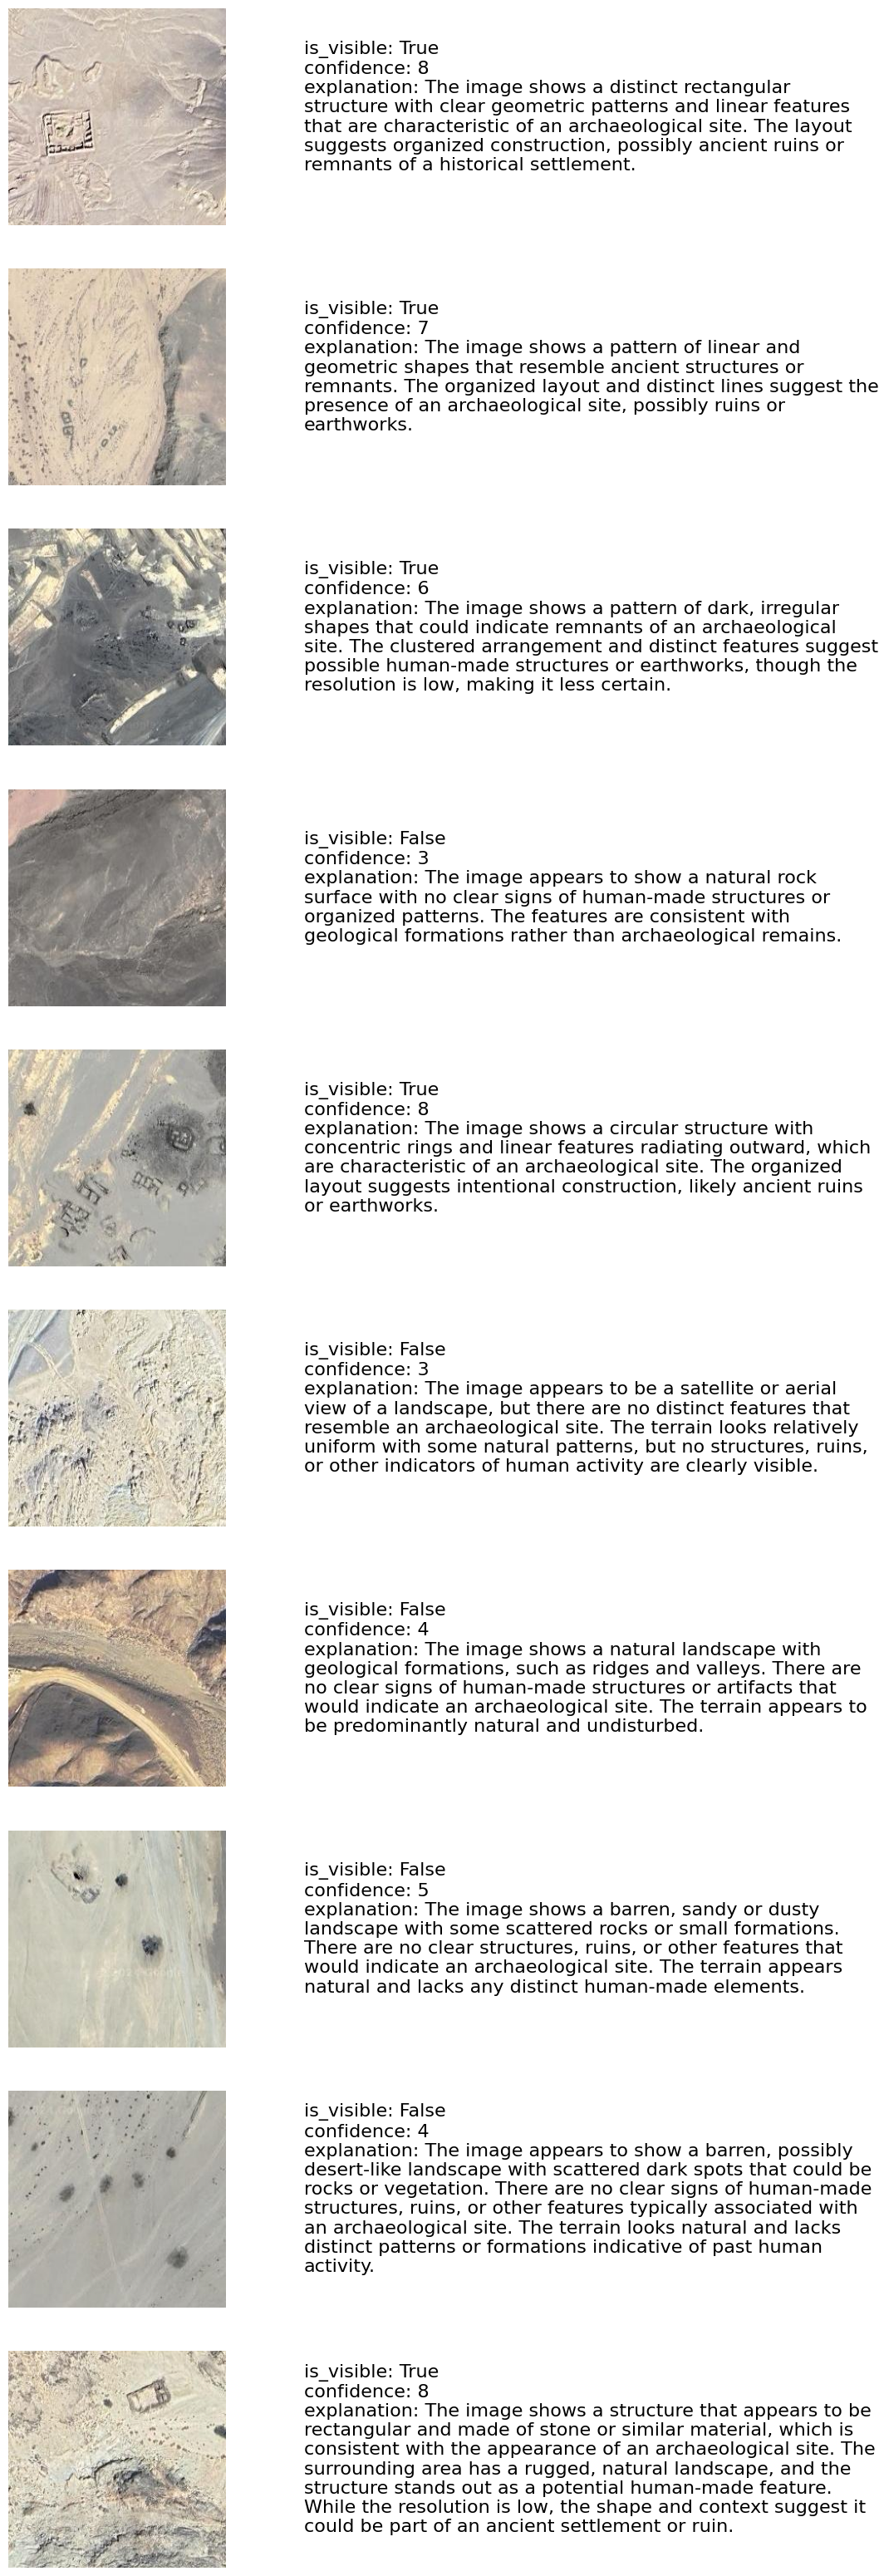

In [27]:
plot_responses(GS_DIR + 'positive_samples/', data['positive'], filename='qwen_ui_res_positives')

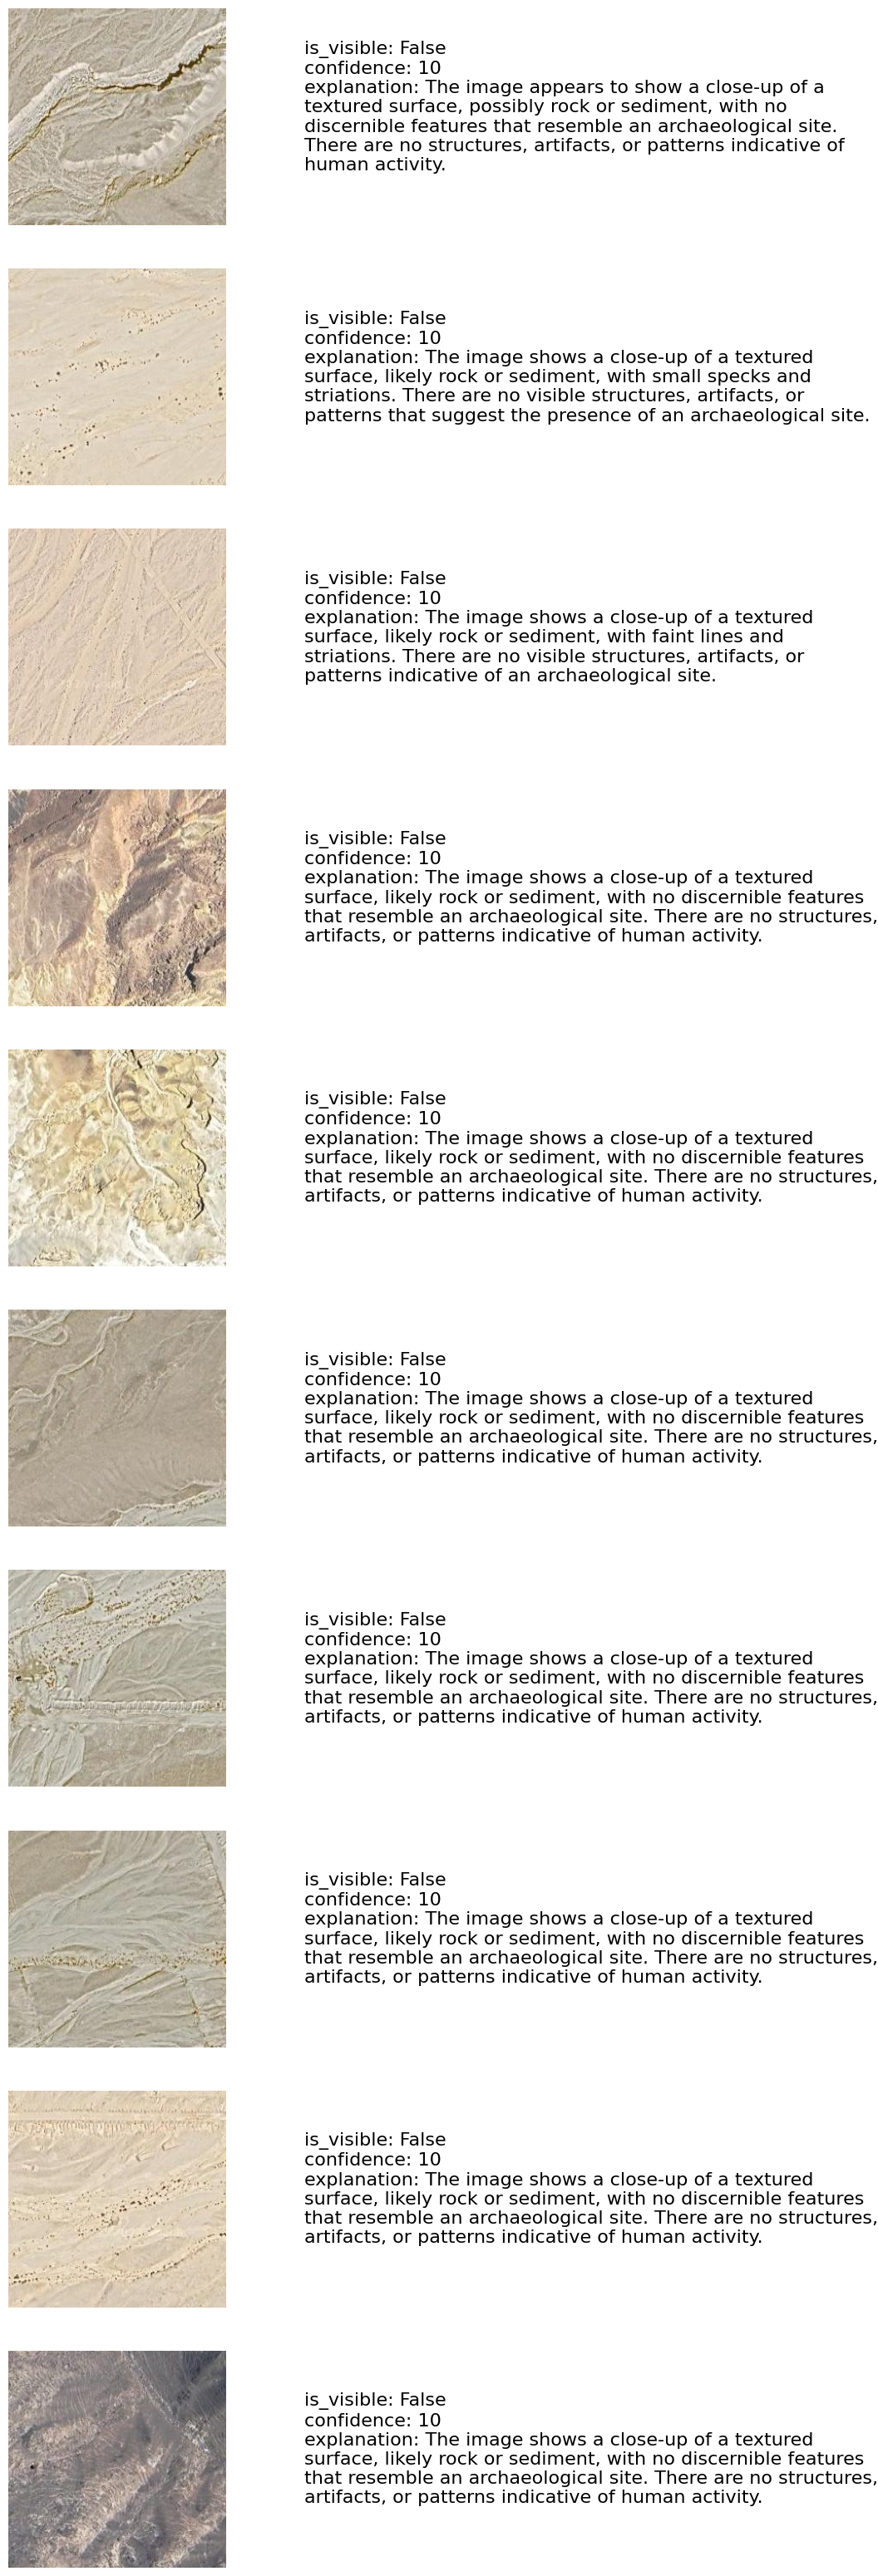

In [28]:
plot_responses(GS_DIR + 'negative_samples/', data['negative'], filename='qwen_ui_res_negatives')